# Complex Stellar Histories

Download all the Jupyter notebooks from: https://github.com/HeloiseS/hoki_tutorials

# Initial Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from hoki.constants import *

%matplotlib inline
plt.style.use('tuto.mplstyle')

### In this tutorial you will learn: 

- The Stellar Formation History class, `SFH`, and its attributes
- Using `CSPEventRate` to generate event rates for complex stellar populations
- Using `CSPSpectra` to generate spectra for complex stellar populations


BPASS contains simple stellar populations (all co-eval) with a total of $10^{6}$ M$_\odot$ at for a given metallicity and imf. 
While this is a valid assumption for some populations, others can have a more complex stellar formation history and metallicity evolution. Therefore, we introduce the `hoki.csp` package. 
This package allows for the creation of more complex stellar populations using the BPASS populations.


# Stellar Formation History


Many of the standard stellar formation histories (SFH) are included in `hoki.csp.sfh` package.
These SFH are generated using the `SFH` class, which always takes a time array and a string as inputs. The time array determines the sampling of the time domain, while the string determines the type of SFH to use. Each available formation history has a unique string identifier. A list of all available formation histories and their identifiers can be found in the hoki documentation. #[link]!! [https://heloises.github.io/hoki/manual.html#module-hoki.csp.sfh]

If you wish to us a built-in SFH, you will also needs to parse a dictionary containing the necessary parameters and their values.
A comprehensive list of these can also be found in the documentation.

In this example we load in three of the built-in SFH: 

- Burst
- Constant
- Log Normal


### SFH class

In [2]:
from hoki.csp.sfh import SFH

In [3]:
# Creating 100 time points from age 0 to the current age of the Universe
time_axis = np.linspace(0,HOKI_NOW, 100)

# Instanciating a Burst SFH
burst = SFH(time_axis, "b", {"T0": 1e9, "constant":10})

# Instanciating a constant SFH
constant = SFH(time_axis, "c", {"constant":1})

# Instanciating a log_normal SFH
log_normal = SFH(time_axis, 'ln', {"constant":10, "tau":0.8, "T0":1})

/Users/Max/Documents/University/University of Auckland/Research/hoki/hoki/csp/sfh.py:166: RuntimeWarning: divide by zero encountered in log
  - ((np.log(self.time_axis/1e9) - self.params['T0']) ** 2) / (2 * self.params['tau'] ** 2)))


Now that we have create `SFH` instances, we can take a look at their shapes by plotting them.
Like other `hoki` objects (`HRDiagram`, `CMD`), the `SFH` class comes with its own plotting method: `SFH.plot()`.

/Users/Max/Documents/University/University of Auckland/Research/hoki/hoki/csp/sfh.py:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sfh_plot = plt.subplot(loc)
/Users/Max/Documents/University/University of Auckland/Research/hoki/hoki/csp/sfh.py:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sfh_plot = plt.subplot(loc)


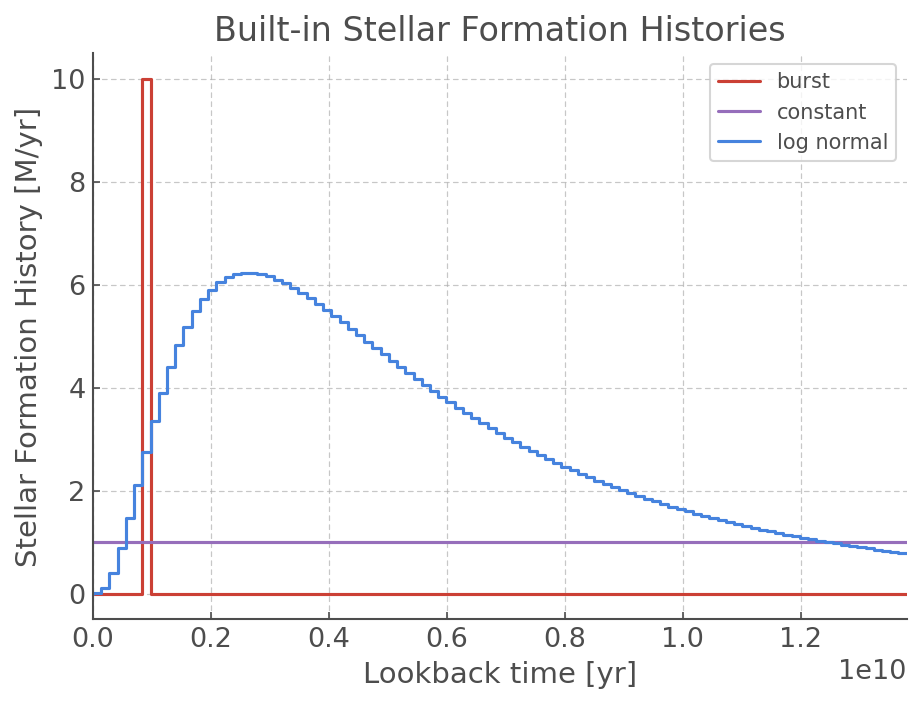

In [4]:
burst.plot(label="burst")
constant.plot(label="constant")
log_normal.plot(label="log normal")
plt.title("Built-in Stellar Formation Histories")
plt.ylabel("Stellar Formation History [M/yr]")
plt.xlabel("Lookback time [yr]")
plt.xlim(0, 13.8e9)
plt.legend()
plt.show()

### Custom SFH 

Besides the built-in stellar formation histories, it's possible to make your own stellar formation history. 

The identifier `"custom"` allows for the input of a value array, `sfh_arr`, which contains the star formation rates associated with each time bin parsed in `time_axis`(that means it should be the same length).
In this case, the parameter dictionary is not called and you don't need to provide it. 

In [5]:
# Custom star formation history values
values = np.linspace(0,10,len(time_axis))

# Instanciation of our custom SFH object
custom = SFH(time_axis, "custom", sfh_arr=values)

Let's plot it to see what it looks like :)

/Users/Max/Documents/University/University of Auckland/Research/hoki/hoki/csp/sfh.py:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sfh_plot = plt.subplot(loc)


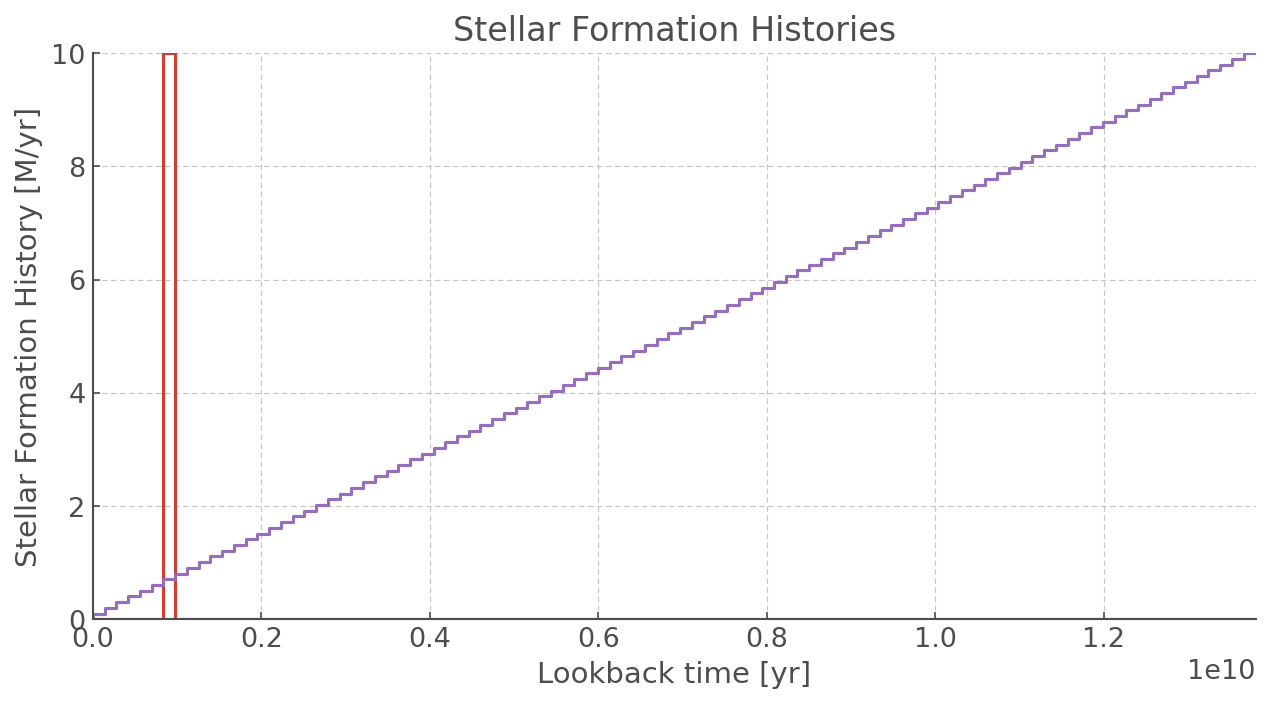

In [6]:
plt.figure(figsize=(10,5))
burst.plot()
custom.plot()
plt.title("Stellar Formation Histories")
plt.ylabel("Stellar Formation History [M/yr]")
plt.xlabel("Lookback time [yr]")
plt.xlim(0, 13.8e9)
plt.ylim(0,10)
plt.show()

# Event Rate calculations

By combining the BPASS populations with the **complex SFH**, it is possible to **generate transient rates** for the new populations.
`hoki` provides the subpackage `hoki.csp.eventrate` for this purpose. 


### Initialisation of `CSPEventRate`
When initialising the `CSPEventRate` class, it loads and normalises the BPASS supernova files for all metallicities. Stored in a `pandas.DataFrame`, they are accessible using `CSPEventRate.bpass_rates`. The following event types are available from BPASS: `[Ia, IIP, II, Ib, Ic, LGRB, PISNe, low_mass]`

BPASS contains a selection of initial mass functions. To support all of them, the `CSPEventRate` class requires an imf identifier. These can be found in [the class's documentation](https://heloises.github.io/hoki/manual.html#module-hoki.csp.eventrate). 

**! ! ! ! WARNING ! ! ! !**

If you want to run the following cells you will to change the `path_to_files` to your local folder containing the BPASS `supernova` files. If you downloaded them straight off the [google drive](https://drive.google.com/drive/u/1/folders/1GfMSO2ZiIabHSQRh7zTA3I51DPGbmtAB), it'll probably have a name like `bpass_v2.2.1_imf135_300`


In [7]:
from hoki.csp.eventrate import CSPEventRate

In [8]:
path_to_files = "/Users/Max/Documents/University/University of Auckland/Research/bpass_v2.2.1_imf135_300"#"../BPASS_hoki_dev/bpass_v2.2.1_imf135_300"
imf_identifier = "imf135_300"
ER_CSP = CSPEventRate(path_to_files, imf_identifier, binary=True)

### Calculating event rates

After initialising the class, the event rates for complex stellar populations can be calculated using the following functions: 
- `CSPEventRate.at_time`
- `CSPEventRate.over_time`

Both take the same 3 parameters:
- Description of the SFH
- Descriptoin of the Metallicity Evolution
- An array containing the event types to be calculated

## Defining an SFH and metallicity evolution


We define a constant metallicity and stellar formation rate. The methods in `CSPEventRate` require the SFH and metallicity evolution to be provided as python callables (i.e something that can be called, i.e something that require brackets to work: `myfunction()`). It is also possible to use a `SFH` object as an input for the SFH evolution -- it was designed to work with these :)

Here, we define two python functions describing the SFH and metallicity evolution. These have to be set to 0 if the age is older than the universe. We define the SFR to be constant at 1 and the metallicity to be constant at solar.

In [9]:
def SFR_evolution(t):
    if t < HOKI_NOW:
        return 1.0
    else:
        return 0

def Z_evolution(t):
    return 0.0020

#### `CSPEventRate.at_time` 

*Input*

In addition to the 3 standard input parameters, you need to provide **the time at which** you want the event rates calculated. 

**You can provide more than one SFH and metallicity histories, as described below**

As an optional input, the **sampling rate** of the SFH and metallicity evolution can be given. The default sampling is set to 1000. This makes the calculation accurate and fast. If a negative number is given, the BPASS bins are used.

*Output*

The output an array, where each element corresponds to an SHF/metallicity history pair. 

Each complex stellar population contains an array with the type of transient event as an identifier.

```
 output[nr csp][event type]
```

In [10]:
# calculate rate at LB = 0 Gyr
er_zero = ER_CSP.at_time(SFR_evolution, Z_evolution, ["Ia"], 0)
print("Event Rate now:", er_zero[0]["Ia"])

# calculate rate at LB = 10 Gyr
er_ten = ER_CSP.at_time(SFR_evolution, Z_evolution, ["Ia"], 10e9)
print("Event rate at 10 Gyr lookback time:", er_ten[0]["Ia"])

# High sampling event rate
er_high_sampling = ER_CSP.at_time(SFR_evolution, Z_evolution, ["Ia"], 10e9, 2000)

print("Event rate 1000 samples:", er_high_sampling[0]["Ia"])

Event Rate now: 0.0015103559493986228
Event rate at 10 Gyr lookback time: 0.0013245082839476612
Event rate 1000 samples: 0.0013273604259601117


It is also possible to input several SFH and metallicity evolutions in a single function call by inputting two lists of equal length. Each SFH will be associated with a metallicity evolution at the same index.

In [11]:
er = ER_CSP.at_time([SFR_evolution, SFR_evolution], 
                    [Z_evolution, Z_evolution], 
                    ["Ia", "II"], 
                    0)
print("First history, Ia rates:", er[0]["Ia"])
print("Second history, II rates:", er[1]["II"])


First history, Ia rates: 0.0015103559493986228
Second history, II rates: 0.0035807774002009902


Of course, it is also possible to provide a `SFH` object from `hoki` as an input.

In [12]:
er = ER_CSP.at_time(constant, 
                    Z_evolution, 
                    ["Ia", "II"], 
                    0)
print("Ia rates:", er[0]["Ia"])
print("II rates:", er[0]["II"])

Ia rates: 0.0015103573172394677
II rates: 0.0035807774002009902


#### `CSPEventRate.over_time` 

This method splits the lookback time up into a chosen number of bins and calculates the event rate over the whole lookback time at once. Because the event rates over the full history of the universe is calculated, this method is more computationally intensive than `CSPEventRate.at_time`.

In addition to the 3 standard input parameters, this method requires you to provide a number of bins that determines the number of bins the complete lookback time is split into.

It has an optional argument, `return_time_edges`, that will return the time edges of the binning (in addition to the standard outputs).  

In [13]:
er_all, edges = ER_CSP.over_time([SFR_evolution], [Z_evolution], ["Ia"], 100, return_time_edges=True)

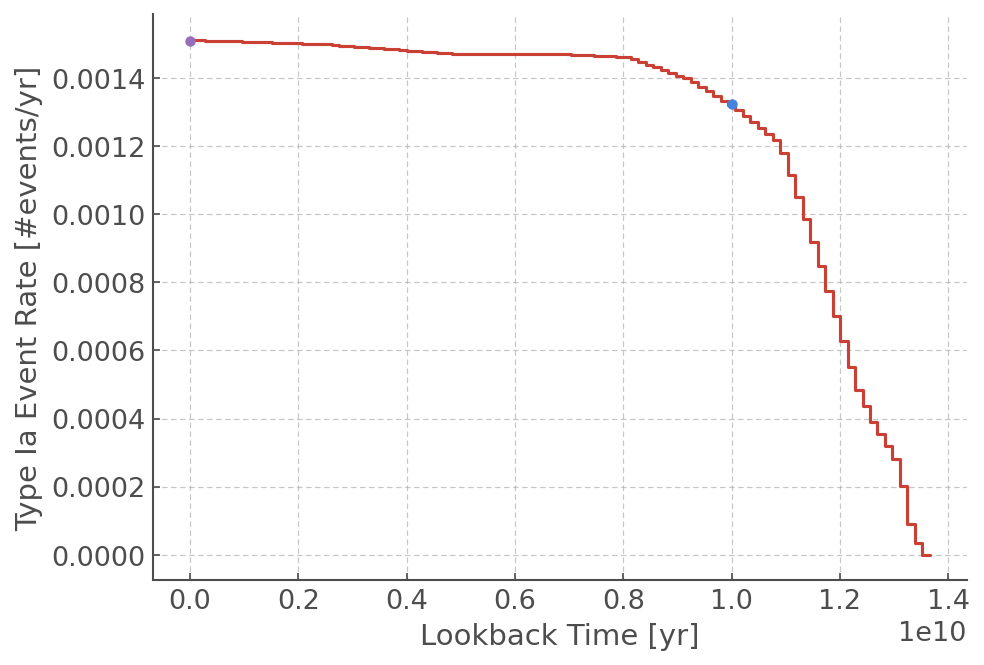

In [14]:
plt.step(edges[:-1], er_all[0]["Ia"], where="pre")
plt.xlabel("Lookback Time [yr]")
plt.ylabel("Type Ia Event Rate [#events/yr]")
plt.plot(0, er_zero[0]["Ia"], "o")
plt.plot(10e9, er_ten[0]["Ia"], "o")
plt.show()

# Spectra calculations

Similar to the event rate calculations, it is also possible to calculate a spectrum using `CSPSpectra` in the `hoki.csp.spectra` submodule.


### Initialisation
On initialisation it will load all the BPASS spectra and normalise them to L$_\odot$/M$_\odot$. The first time loading the spectra files is relatively slow, because it has to read each file separately and load it into a `numpy.ndarray`. To speed things up after the first load, a copy of all the spectra is stored in the data folder as a pickle for faster future access.

Similarly to the `CSPEventRate` class, the `CSPSpectra` requires a IMF identifier. A list of available identifiers can be found in [the documentation](https://heloises.github.io/hoki/manual.html#module-hoki.csp.spectra).

**! ! ! ! WARNING! ! ! !**

If you want to run the following cells you will to change the `path_to_spectra` to your local folder containing the BPASS `spectra` files. If you downloaded them straight off the [google drive](https://drive.google.com/drive/u/1/folders/1GfMSO2ZiIabHSQRh7zTA3I51DPGbmtAB), it'll probably have a name like `bpass_v2.2.1_imf135_300`

In [15]:
from hoki.csp.spectra import CSPSpectra

In [16]:
path_to_spectra = "/Users/Max/Documents/University/University of Auckland/Research/bpass_v2.2.1_imf135_300"#"../BPASS_hoki_dev/bpass_v2.2.1_imf135_300"
imf_identifier = "imf135_300"
SPEC_CSP = CSPSpectra(path_to_spectra, imf_identifier)

Trying to load precompiled file.
Done Loading.


### Calculating spectra

After initialising the class, the spectra for complex stellar populations can be calculated using the following functions: 
- `CSPSpectra.at_time`
- `CSPSpectra.over_time`

Instead of the three standard input parameters of the `CSPEventRate` functions, these require 2 standard parameters:
- Description of the SFH
- Descriptoin of the Metallicity Evolution

The SFH can again be a python callable or a `hoki` `SFH` object. The metallicity evolution has to be described by a python callable (function). We will use the same constant functions that we defined before when calculating the event rates.

In [17]:
spectrum_zero = SPEC_CSP.at_time(SFR_evolution, Z_evolution, 0)

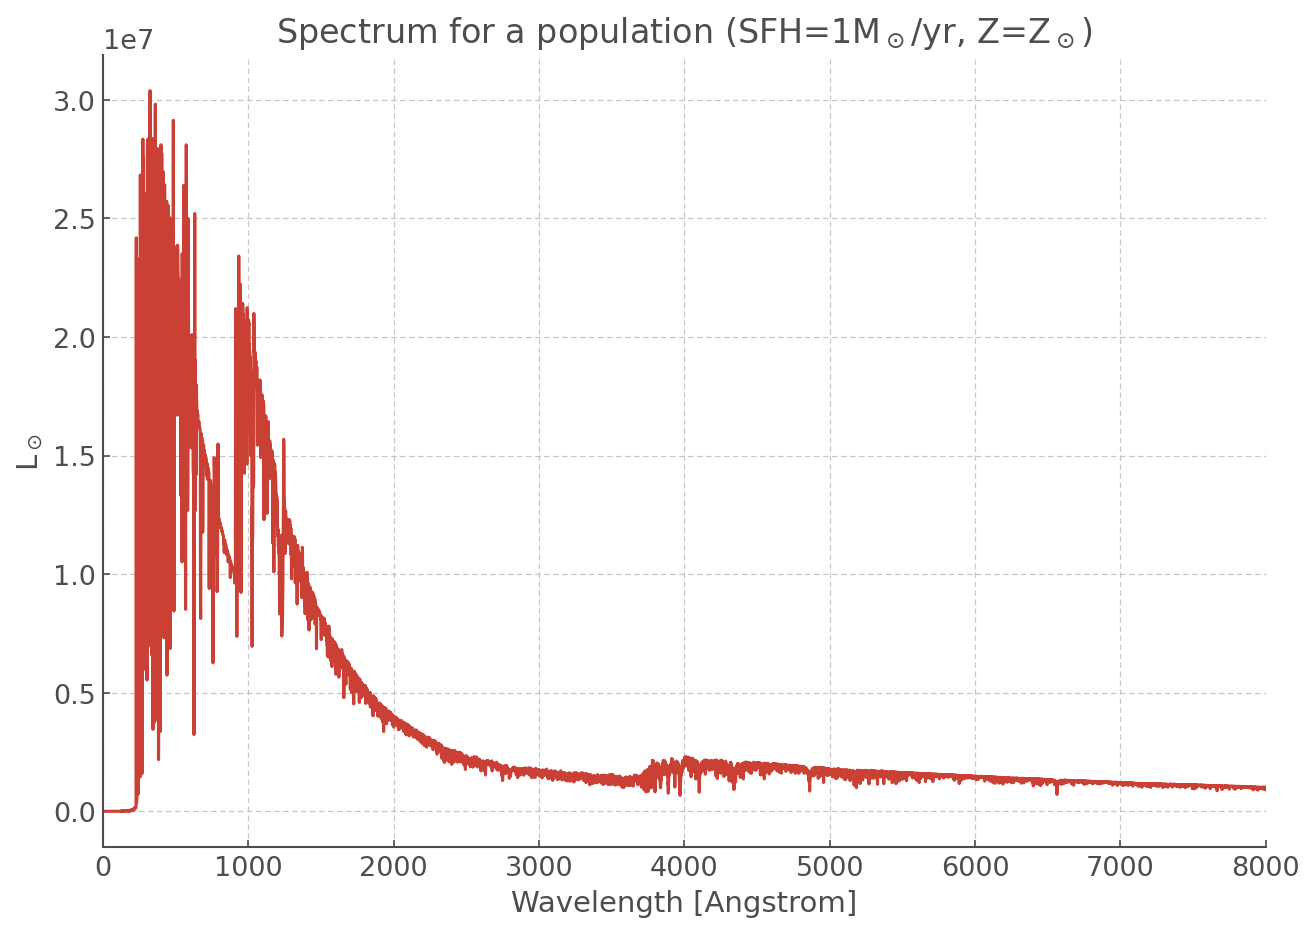

In [18]:
plt.figure(figsize=(10,7))
plt.plot(np.arange(100000), spectrum_zero[0])
plt.xlim(0,8000)
plt.title("Spectrum for a population (SFH=1M$_\odot$/yr, Z=Z$_\odot$)")
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("L$_\odot$")
plt.show()

# Grid Calculations: EventRates & Spectra

Sometimes using a Python callable isn't the right way to describe the stellar formation history, such as when working with simulations with stored data points. Therefore, it is also possible to provide a 2D grid (`nr_sfh`x`13`x`N`) as an SFH input. This matrix splits up each SFH into BPASS metallicity bins (`13`) per time point (`N`). The `nr_sfh` is always necesarry even when a single SFH grid is given. 

The associated functions are: 

- `CSPEventRate.grid_at_time`
- `CSPEventRate.grid_over_time`

- `CSPSpectra.grid_at_time`
- `CSPSpectra.grid_over_time`

Instead of taking a SFH and metallicity evolution both are separated to allow for material being created with different metallicities at the same time. Instead they need a `time_points` parameter describing what the lookback times of the 2D SFH are.

**Note**

Depending on your operating system, a "`NumbaWarning` about TBB threading" might appear when using the grid functions. This can be safely ignored.


## EventRates

In [19]:
# setup example 2D grid
time_points = np.linspace(0,HOKI_NOW, 101)
SFH_2D = np.zeros((13,len(time_points)), dtype=np.float64)
bpass_Z_index = np.array([np.argmin(np.abs(Z_evolution(i) - BPASS_NUM_METALLICITIES)) for i in time_points])
SFH_2D[bpass_Z_index] += np.array([SFR_evolution(i) for i in time_points])

Because our `SFH_2D` is only a 13x101 matrix we transform it into a 1x13x101 matrix for it to be used as input of our `*.grid_at_time` and `*.grid_over_time` functions.

In [20]:
# Transform into (1x13xtime_points)
SFH_2D = SFH_2D.reshape((1,13,len(time_points)))

In [21]:
# Event rate at lookback time t = 0
er_at_time_per_metallicity1 = ER_CSP.grid_at_time(SFH_2D, time_points, ["Ia"], 0)

# Event rate at lookback time t = 10 Gyr
er_at_time_per_metallicity2 = ER_CSP.grid_at_time(SFH_2D, time_points, ["Ia"], 10e9)

# The event rate over lookback time
er_over_time_per_metallicity, time_edges = ER_CSP.grid_over_time(SFH_2D, time_points, ["Ia"], 100, return_time_edges=True)


/usr/local/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


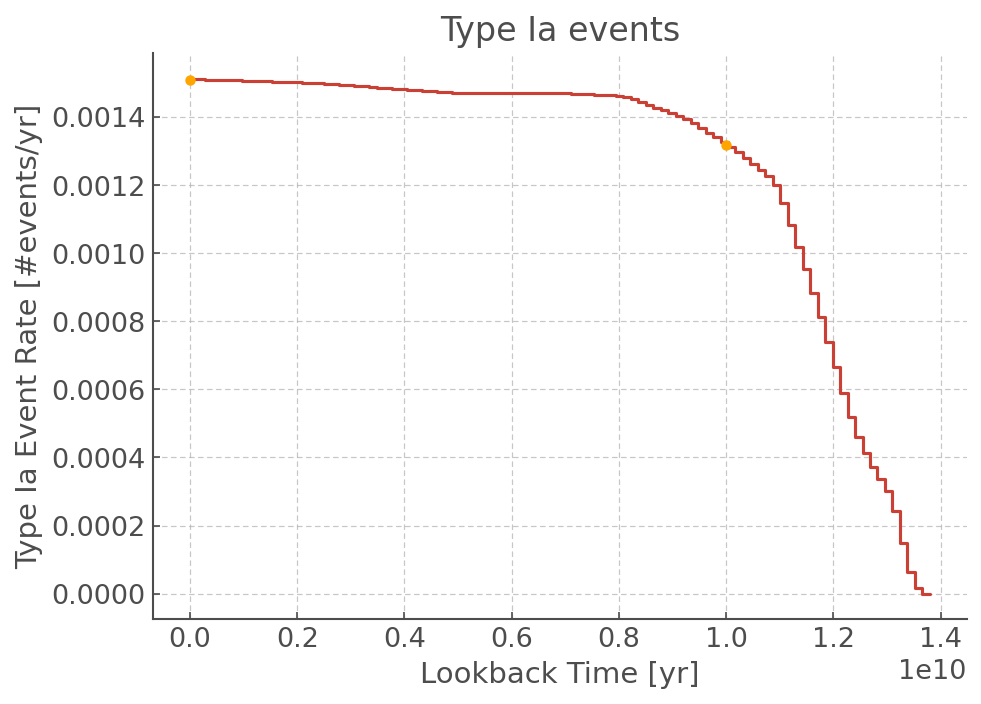

In [22]:
# Sum select the first SFH and sum over the metallicity bins
er_over_time = er_over_time_per_metallicity[0].sum(axis=0)
er_at_time1 = er_at_time_per_metallicity1[0].sum(axis=0)
er_at_time2 = er_at_time_per_metallicity2[0].sum(axis=0)

plt.step(time_edges, er_over_time[0], label="Ia")
plt.plot(0, er_at_time1[0], "o", label="Ia", color="orange")
plt.plot(10e9, er_at_time2[0], "o", label="Ia", color="orange")
plt.title("Type Ia events")
plt.xlabel("Lookback Time [yr]")
plt.ylabel("Type Ia Event Rate [#events/yr]")
plt.show()

## Spectra

Spectra are tricky to calculate and the `sample_rate` is extremely important in determining the accuracy of the spectrum. Below we apply the `CSPSpectra.grid_at_time` and `CSPSpectra.grid_over_time` on the same SFH_2D. 

`CSPSpectra.grid_over_time` does a more accurate job in calculating the spectrum, but it's relatively slow and hard to get a spectrum at a specific age without adjusting your SFH. 
`CSPSpectra.grid_at_time`'s accuracy depends on the `sample_rate` and increasing it, brings it closer to the `CSPSpectra.grid_over_time` spectrum. The function is faster, but increased `sample_rate` deminishes this speed up.

The difference is limited but could be significany. Therefore, it's important to keep this in mind when selecting which function to use and what `sample_rate` to use.

In [23]:
spec_at_time_per_metallicity1 = SPEC_CSP.grid_at_time(SFH_2D, time_points, 0, sample_rate=1000)
spec_at_time_per_metallicity2 = SPEC_CSP.grid_at_time(SFH_2D, time_points, 0, sample_rate=5000)

spec_over_time_per_metallicity = SPEC_CSP.grid_over_time(SFH_2D, time_points, 10)

In [24]:
spec_at_time1 = spec_at_time_per_metallicity1[0].sum(axis=0)
spec_at_time2 = spec_at_time_per_metallicity2[0].sum(axis=0)
spec_over_time = spec_over_time_per_metallicity[0].sum(axis=0)

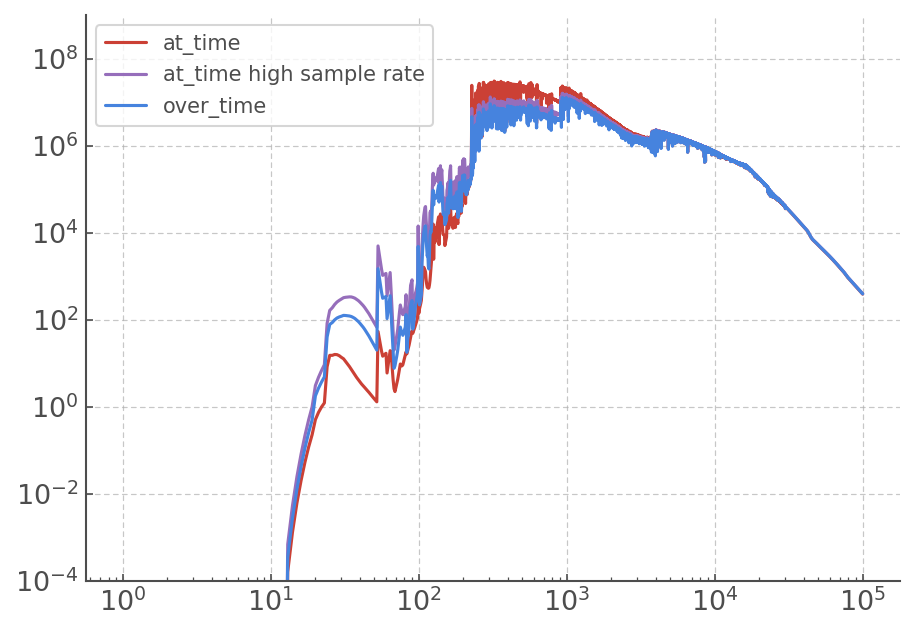

In [25]:
plt.plot(np.arange(100000), spec_at_time1, label="at_time",)
plt.plot(np.arange(100000), spec_at_time2, label="at_time high sample rate")
plt.plot(np.arange(100000), spec_over_time[0], label="over_time")
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4,1e9)
plt.legend()
plt.show()